# Feature Engineering

In [170]:
from dataclasses import dataclass
from datetime import timedelta, datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.style as style

import sys
sys.path.append('..')

from src.features import build_features as buif
from src.visualization import visualize as viz
import src.utils as utils

In [171]:
#style.available
style.use('fivethirtyeight')

In [172]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
FILE_PATH = '../data/interim/eo_football_interim'
football = pd.read_csv(FILE_PATH)
football.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,SeasonLabel
0,E0,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,9,10,14,7,4,3,2,0,0,2016_2017
1,E0,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,3,12,15,3,6,2,2,0,0,2016_2017
2,E0,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,4,10,14,5,6,0,0,0,0,2016_2017
3,E0,2016-08-13,Hull,Leicester,2,1,H,1,0,H,...,5,8,17,5,3,2,2,0,0,2016_2017
4,E0,2016-08-13,Man City,Sunderland,2,1,H,1,0,H,...,3,11,14,9,6,1,2,0,0,2016_2017


In [174]:
football['Date'] = pd.to_datetime(football['Date'])
football.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,SeasonLabel
0,E0,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,9,10,14,7,4,3,2,0,0,2016_2017
1,E0,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,3,12,15,3,6,2,2,0,0,2016_2017
2,E0,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,4,10,14,5,6,0,0,0,0,2016_2017
3,E0,2016-08-13,Hull,Leicester,2,1,H,1,0,H,...,5,8,17,5,3,2,2,0,0,2016_2017
4,E0,2016-08-13,Man City,Sunderland,2,1,H,1,0,H,...,3,11,14,9,6,1,2,0,0,2016_2017


## Features to create

This are the features that are engineered from the datasets. Some features are generated season-wise while some are for the entire dataset. The dataset ranges from 2016 - 2021, season 2016 would be used as dummy data to engineer features for the rest seasons. This data should not be used for machine learning model creation.

**Running Average Features**
- HCLPOS, ACLPOS : Current league position for the home(away) team
- HELORK, AELORK: Elo ran for the home(away) team when k = 20
- HAVGS, AAVGS: Home(away) average shots
- HAVGST, AAVGST; Home (away) average shots on target
- HAVGGS, AAVGGS: Home (away) average goals scored
- HAVGGC, AAVGGC: Home (away) average goals conceded
- HAVGC, AAVGC: Home (away) corners
- HAVGCC, AAVGCC: Home (away) corners conceded
- HAVGWINS, AAVGWINS: Homw (away) average wins
- HAVGCLEAN, AAVGCLEAN: Home (away) average clean sheets

In [175]:
league_tr = buif.LeaguePosAdder()
football = league_tr.fit_transform(football)
football.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AY,HR,AR,SeasonLabel,HCLPOS,ACLPOS,HGD,AGD,HPOINTS,APOINTS
0,E0,2016-08-13,Burnley,Swansea,0,1,A,0,0,D,...,2,0,0,2016_2017,0,0,0,0,0,0
1,E0,2016-08-13,Crystal Palace,West Brom,0,1,A,0,0,D,...,2,0,0,2016_2017,3,17,0,0,0,0
2,E0,2016-08-13,Everton,Tottenham,1,1,D,1,0,H,...,0,0,0,2016_2017,5,16,0,0,0,0
3,E0,2016-08-13,Hull,Leicester,2,1,H,1,0,H,...,2,0,0,2016_2017,7,15,0,0,0,0
4,E0,2016-08-13,Man City,Sunderland,2,1,H,1,0,H,...,2,0,0,2016_2017,9,18,0,0,0,0


In [176]:
elo_table = utils.build_elo('E0')
elo_table.head() 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,SeasonLabel,HELORT,AELORT
0,E0,1993-08-14,Arsenal,Coventry,0.0,3.0,A,1993_1994,1400,1400
1,E0,1993-08-14,Aston Villa,QPR,4.0,1.0,H,1993_1994,1400,1400
2,E0,1993-08-14,Chelsea,Blackburn,1.0,2.0,A,1993_1994,1400,1400
3,E0,1993-08-14,Liverpool,Sheffield Weds,2.0,0.0,H,1993_1994,1400,1400
4,E0,1993-08-14,Man City,Leeds,1.0,1.0,D,1993_1994,1400,1400


In [177]:
mask = (elo_table['Date'] >= football.Date.min()) & (elo_table['Date'] <= football.Date.max())
HELORT = elo_table[mask]['HELORT']
AELORT = elo_table[mask]['AELORT']

In [178]:
football['HELORT'] = HELORT.values
football['AELORT'] = AELORT.values

In [179]:
football.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AR,SeasonLabel,HCLPOS,ACLPOS,HGD,AGD,HPOINTS,APOINTS,HELORT,AELORT
1895,E0,2021-05-23,Liverpool,Crystal Palace,2,0,H,1,0,H,...,0,2020_2021,5,14,24,-23,66,44,1825,1408
1896,E0,2021-05-23,Man City,Everton,5,0,H,2,0,H,...,0,2020_2021,1,9,46,4,83,59,1900,1532
1897,E0,2021-05-23,Sheffield United,Burnley,1,0,H,1,0,H,...,0,2020_2021,20,17,-44,-21,20,39,1293,1443
1898,E0,2021-05-23,West Ham,Southampton,3,0,H,2,0,H,...,0,2020_2021,6,15,12,-18,62,43,1550,1436
1899,E0,2021-05-23,Wolves,Man United,1,2,A,1,2,A,...,0,2020_2021,13,2,-15,28,45,71,1478,1743


In [264]:
@dataclass
class ClubStat:
    ts:int = 0
    tst:int = 0
    tgc:int = 0
    tc:int = 0
    tcc:int = 0
    tw:int = 0
    tcl:int = 0
    tgs:int = 0
    cnt:int = 0

In [284]:
#HAVGGS, AAVGGS

seasons = football.SeasonLabel.unique()

football[['HAVGS', 'HAVGST', 'HAVGGS', 'HAVGGC', 'HAVGC', 'HAVGCC', 'HAVGW', 'HAVGCL',
         'AAVGS', 'AAVGST', 'AAVGGS', 'AAVGGC', 'AAVGC', 'AAVGCC', 'AAVGW', 'AAVGCL']] = 0.0

for season in seasons:
    data = football[football['SeasonLabel'] == season]
    clubs_dict = {club: ClubStat() for club in data.HomeTeam.unique()}
    
    for idx, row in data.iterrows():
        # Average shots
        home_cnt = clubs_dict[row.HomeTeam].cnt
        away_cnt = clubs_dict[row.AwayTeam].cnt
        
        if home_cnt >= 2:
            football.loc[idx, 'HAVGS'] = clubs_dict[row.HomeTeam].ts / home_cnt
            football.loc[idx, 'HAVGST'] = clubs_dict[row.HomeTeam].tst / home_cnt
            football.loc[idx, 'HAVGGS'] = clubs_dict[row.HomeTeam].tgs / home_cnt
            football.loc[idx, 'HAVGGC'] = clubs_dict[row.HomeTeam].tgc / home_cnt
            football.loc[idx, 'HAVGC'] = clubs_dict[row.HomeTeam].tc / home_cnt
            football.loc[idx, 'HAVGCC'] = clubs_dict[row.HomeTeam].tcc / home_cnt
            football.loc[idx, 'HAVGW'] = clubs_dict[row.HomeTeam].tw / home_cnt
            football.loc[idx, 'HAVGCL'] = clubs_dict[row.HomeTeam].tcl / home_cnt
        
        if away_cnt >= 2:
            football.loc[idx, 'AAVGS'] = clubs_dict[row.AwayTeam].ts /  away_cnt
            football.loc[idx, 'AAVGST'] = clubs_dict[row.AwayTeam].tst /  away_cnt
            football.loc[idx, 'AAVGGS'] = clubs_dict[row.AwayTeam].tgs /  away_cnt
            football.loc[idx, 'AAVGGC'] = clubs_dict[row.AwayTeam].tgc /  away_cnt
            football.loc[idx, 'AAVGC'] = clubs_dict[row.AwayTeam].tc /  away_cnt
            football.loc[idx, 'AAVGCC'] = clubs_dict[row.AwayTeam].tcc /  away_cnt
            football.loc[idx, 'AAVGW'] = clubs_dict[row.AwayTeam].tw /  away_cnt
            football.loc[idx, 'AAVGCL'] = clubs_dict[row.AwayTeam].tcl /  away_cnt
        
        # update the avgs
        clubs_dict[row.HomeTeam] = ClubStat(
            ts=clubs_dict[row.HomeTeam].ts + row.HS,
            tst=clubs_dict[row.HomeTeam].tst + row.HST,
            tgs=clubs_dict[row.HomeTeam].tgs + row.FTHG,
            tgc=clubs_dict[row.HomeTeam].tgc + row.FTAG,
            tc=clubs_dict[row.HomeTeam].tc + row.HC,
            tcc=clubs_dict[row.HomeTeam].tcc + row.AC,
            tw=clubs_dict[row.HomeTeam].tw + (1 if row.FTR == 'H' else 0),
            tcl=clubs_dict[row.HomeTeam].tcl + (1 if row.FTAG == 0 else 0),
            cnt=clubs_dict[row.HomeTeam].cnt + 1
        )
        
        clubs_dict[row.AwayTeam] = ClubStat(
            ts=clubs_dict[row.AwayTeam].ts + row.AS,
            tst=clubs_dict[row.AwayTeam].tst + row.AST,
            tgs=clubs_dict[row.AwayTeam].tgs + row.FTAG,
            tgc=clubs_dict[row.AwayTeam].tgc + row.FTHG,
            tc=clubs_dict[row.AwayTeam].tc + row.AC,
            tcc=clubs_dict[row.AwayTeam].tcc + row.HC,
            tw=clubs_dict[row.AwayTeam].tw + (1 if row.FTR == 'A' else 0),
            tcl=clubs_dict[row.AwayTeam].tcl + (1 if row.FTHG == 0 else 0),
            cnt=clubs_dict[row.AwayTeam].cnt + 1
        )

In [289]:
# football[(football['HomeTeam'] == 'Man United') | (football['AwayTeam'] == 'Man United')][['HomeTeam', 'AwayTeam', 'FTHG','FTAG', 'HAVGGS', 'AAVGGS']]

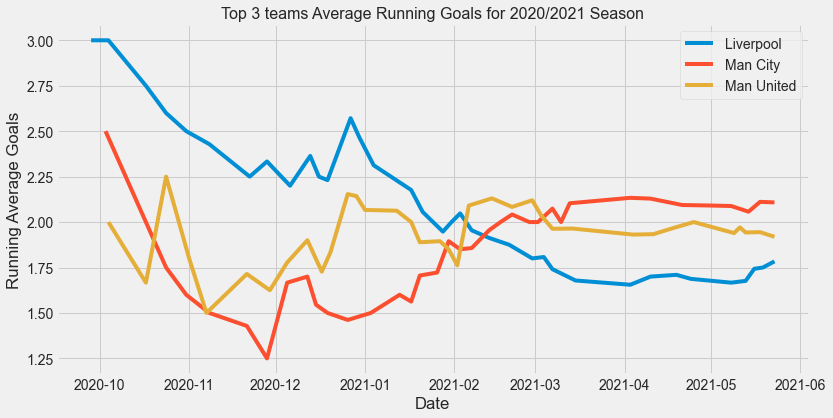

In [287]:
from src.visualization import visualize as viz
fig = viz.plot_avggs(football, club=['Liverpool', 'Man City', 'Man United'], season_label='2020_2021', title='Top 3 teams Average Running Goals for 2020/2021 Season')
fig.savefig('../reports/figures/top3teams_avggs.jpeg', dpi=100)

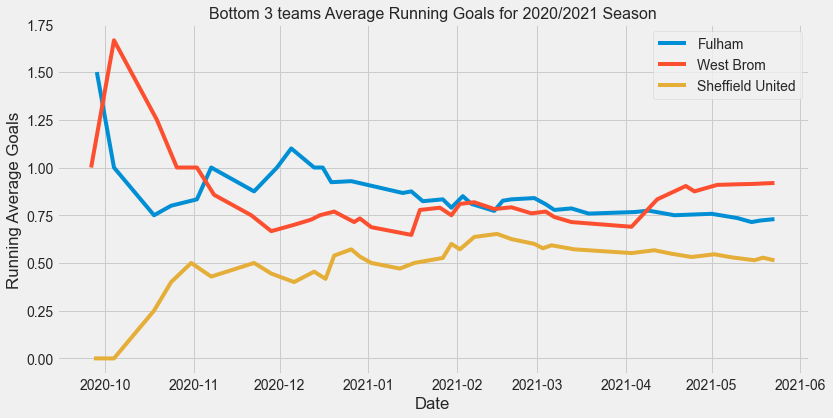

In [288]:
fig = viz.plot_avggs(football, club=['Fulham', 'West Brom', 'Sheffield United'], season_label='2020_2021', title='Bottom 3 teams Average Running Goals for 2020/2021 Season')
fig.savefig('../reports/figures/bottom3teams_avggs.jpeg', dpi=100)

In [290]:
columns = ['Date', 'SeasonLabel', 'HomeTeam', 'AwayTeam', 'FTR', 'HCLPOS', 'ACLPOS', 'HGD',
           'AGD', 'HPOINTS', 'APOINTS', 'HELORT', 'AELORT', 'HAVGGS', 'AAVGGS',
       'HAVGS', 'AAVGS', 'HAVGST', 'AAVGST', 'HAVGGC', 'AAVGGC', 'HAVGC',
       'AAVGC', 'HAVGCC', 'AAVGCC', 'HAVGCL', 'AAVGCL']

football_processed = football[columns]
FILE_PATH = '../data/processed/eo_football_processed.csv'

football_processed.to_csv(FILE_PATH, index=False)